# **Real-Time Face Mask Detection**

## 1. Introduction


Recently, in December 2019, the city of Wuhan, China, became the center of an outbreak of a "pneumonia" of unknown origin. In January, Chinese scientists discovered the origin of a new coronavirus (SARS-CoV-2) that is causing these pneumonias. In February 2020, these pneumonias were named Covid-19 by the World Health Organization, a new disease that spread worldwide and soon became a pandemic.

In the quest to contain the advance of this new disease, several countries have made the use of face masks for respiratory protection mandatory. This determination thus decreased the contamination rate of the population and consequently the mortality rate.

Bearing in mind that a part of the population still has mistaken doubts about the need and effectiveness of the use of masks, and therefore does not respect the mandatory use of them. We created a real-time application to detect, through the use of cameras, faces and predict, through neural networks, whether they are wearing some kind of mask or not.

## 2. Objectives

Create and train an artificial intelligence model that can help verify the use of masks in spaces that have cameras, becoming a means for effective and secure monitoring.

## 3. Methods

First, a convolution neural network (CNN) was created and trained using Google Colab. The dataset was obtained through the Kaggle platform, with about 12 thousand images being divided into people with masks and without masks. After creating the CNN, the application was developed, using the OpenCV library so we could easily access the computer's webcam and use a Cascade Classifier to get the regions of a certain image that has one or more faces. With this in hand, we put the neural network to perform the prediction on the regions of faces, returning if a certain person is using the mask or not.

## 4. All imports

In [ ]:
# All imports needed to run

from google.colab import drive
import os
import cv2
import numpy as np
import os
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 5. Loading Dataset

In [ ]:
path = '/content/gdrive/MyDrive/Face Mask Detection'
imgDimension = (128,128,3)
numOfClasses = len(os.listdir('/content/gdrive/MyDrive/Face Mask Detection/dataset/Test'))

# Making Test Set

x_test = []
y_test = []
print("Making Test Set ......")
testPath = path + '/dataset/Test'
myTestListFolders = os.listdir(testPath)
for x in myTestListFolders:
  myPicList = os.listdir(testPath + '/' + str(x))
  print('There is {} images in {}'.format(len(myPicList),x))
  for y in myPicList:
    currentImg = cv2.imread(testPath + '/' + str(x) + '/' + str(y))
    currentImg = cv2.resize(currentImg, (imgDimension[0],imgDimension[1]))
    x_test.append(currentImg)
    if x == 'WithMask':
      y_test.append(1)
    elif x == 'WithoutMask':
      y_test.append(0)
print('There is {} images in x_test and {} in y_test '.format(len(x_test),len(y_test)))

# Transforming in NumpyArray
x_test = np.array(x_test)
y_test = np.array(y_test)

# Making Train Set

x_train = []
y_train = []
print("Making Train Set .....")
trainPath = path + '/dataset/Train'
myTrainListFolders = os.listdir(trainPath)
for x in myTrainListFolders:
  myPicList = os.listdir(trainPath + '/' + str(x))
  print('There is {} images in {}'.format(len(myPicList),x))
  for y in myPicList:
    currentImg = cv2.imread(trainPath + '/' + str(x) + '/' + str(y))
    currentImg = cv2.resize(currentImg, (imgDimension[0],imgDimension[1]))
    x_train.append(currentImg)
    if x == 'WithMask':
      y_train.append(1)
    elif x == 'WithoutMask':
      y_train.append(0)
print('There is {} images in x_train and {} in y_train '.format(len(x_train),len(y_train)))

# Transforming in NumpyArray
x_train = np.array(x_train)
y_train = np.array(y_train)

# Making Validation Set

x_validation = []
y_validation = []
print("Making Validation Set .....")
validationPath = path + '/dataset/Validation'
myValidationListFolders = os.listdir(validationPath)
for x in myValidationListFolders:
  myPicList = os.listdir(validationPath + '/' + str(x))
  print('There is {} images in {}'.format(len(myPicList),x))
  for y in myPicList:
    currentImg = cv2.imread(validationPath + '/' + str(x) + '/' + str(y))
    currentImg = cv2.resize(currentImg, (imgDimension[0],imgDimension[1]))
    x_validation.append(currentImg)
    if x == 'WithMask':
      y_validation.append(1)
    elif x == 'WithoutMask':
      y_validation.append(0)
print('There is {} images in x_validation and {} in y_validation '.format(len(x_validation),len(y_validation)))

# Transforming in NumpyArray
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

Making Test Set ......
There is 483 images in WithMask
There is 509 images in WithoutMask
There is 992 images in x_test and 992 in y_test 
Making Train Set .....
There is 5000 images in WithoutMask
There is 5000 images in WithMask
There is 10000 images in x_train and 10000 in y_train 
Making Validation Set .....
There is 400 images in WithoutMask
There is 400 images in WithMask
There is 800 images in x_validation and 800 in y_validation 


## 6. Preprocessing images

In [ ]:
# Preprocesse all images

def preprocessing_Imgs(img):
  img = img/255.0
  return img

x_train = np.array(list(map(preprocessing_Imgs, x_train)))
x_test = np.array(list(map(preprocessing_Imgs, x_test)))
x_validation = np.array(list(map(preprocessing_Imgs, x_validation)))

# One-hot encoding
y_train = to_categorical(y_train, numOfClasses)
y_test = to_categorical(y_test, numOfClasses)
y_validation = to_categorical(y_validation, numOfClasses)

print("Preprocessing Done!")

Preprocessing Done!


## 7. Data Augmentation

Data Augmentation has already been implemented in the database used, I just put an example of possible use of the technique, but it is not being used in the project.

In [ ]:
dataGen = ImageDataGenerator(
	        width_shift_range=0.1,
	        height_shift_range=0.1,
	        zoom_range=0.2,
	        shear_range=0.1,
	        rotation_range=10)

dataGen.fit(x_train)

## 8. Making CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=imgDimension))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=numOfClasses, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 9. Training Model

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_validation,y_validation),
                    shuffle=1)

Epoch 1/10
313/313 [==============================] - 35s 79ms/step - loss: 0.1624 - accuracy: 0.9375 - val_loss: 0.0663 - val_accuracy: 0.9725
Epoch 2/10
313/313 [==============================] - 24s 76ms/step - loss: 0.0844 - accuracy: 0.9701 - val_loss: 0.0269 - val_accuracy: 0.9937
Epoch 3/10
313/313 [==============================] - 24s 76ms/step - loss: 0.0590 - accuracy: 0.9809 - val_loss: 0.0267 - val_accuracy: 0.9887
Epoch 4/10
313/313 [==============================] - 24s 75ms/step - loss: 0.0337 - accuracy: 0.9884 - val_loss: 0.0554 - val_accuracy: 0.9837
Epoch 5/10
313/313 [==============================] - 24s 75ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0176 - val_accuracy: 0.9937
Epoch 6/10
313/313 [==============================] - 24s 77ms/step - loss: 0.0231 - accuracy: 0.9915 - val_loss: 0.0158 - val_accuracy: 0.9962
Epoch 7/10
313/313 [==============================] - 24s 78ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0211 - val_accuracy:

## 10. Evaluating Model

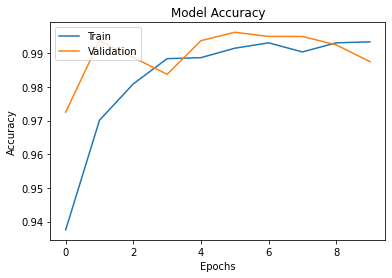

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

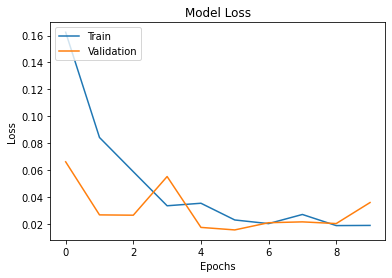

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Functions to test some predictions on images

def plot_image_prediction(i, model_predictions, x_validation, y_validation):
    prediction, imgPredicted, true_label = model_predictions[i], x_validation[i], y_validation[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # OpenCV load images in BGR, we need to convert to RGB
    plt.imshow(cv2.cvtColor(imgPredicted.astype(np.float32), cv2.COLOR_BGR2RGB))

    # Prediction to "i" img
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(prediction),
                                true_label),
                                color=color)

def plot_value_prediction(i, model_predictions, y_validation):
    prediction, true_label = model_predictions[i], y_validation[i]
    plt.grid(False)
    plt.xticks(range(numOfClasses))
    plt.yticks([])
    thisplot = plt.bar(range(numOfClasses), prediction, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(prediction)
    true_label = np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

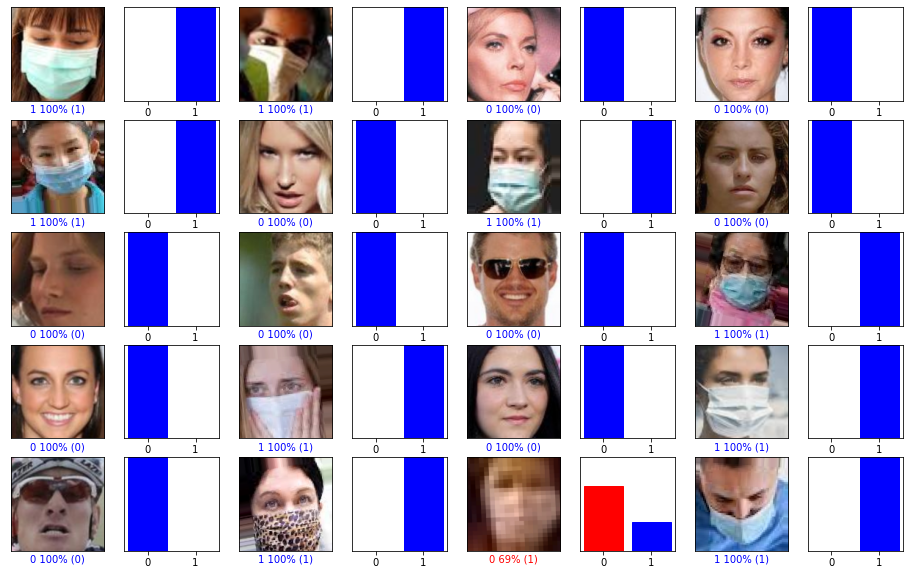

In [ ]:
# Plots randoms test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

predictions = model.predict(x_validation)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    idx = random.randint(0,len(x_validation)-1)
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image_prediction(idx, predictions, x_validation, y_validation)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_prediction(idx, predictions, y_validation)

## 11. Saving Model

In [ ]:
model.save(path + '/model')

## 12. Conclusion

We obtained excellent results in the prediction of the convolutional neural network, having an accuracy rate of 98.75% in the validation set. And when run in the real time application, the results remained satisfactory.

## 13. Issues and future improvements

The Cascade Classifier had problems detecting the faces in the camera, especially when masks were used. We tested other Cascade Classifiers, but they showed little improvement and demanded a higher computational cost, resulting in a decrease in FPS. 

Although the application can run in real time, we still have a low FPS rate, around 40 frames per second without face detection, when a face is detected and the CNN is executed, this rate drops to 15 frames per second (values with the algorithm running on CPU).

Therefore, we can conclude that the future improvements needed would be the search or the creation and training of a better face detector, and to be able to run the algorithm on a GPU, trying our best to increase the FPS rate.

## 14. References


[1] - [Kaggle Dataset](https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset)

[2] - [OpenCV Library](https://github.com/opencv/opencv/tree/master)

[3] - [TensorFlow Documentation](https://www.tensorflow.org/api_docs/python/tf)

[4] - [Chando0185 Project](https://github.com/Chando0185/Face_Mask_Detection)
